<a href="https://colab.research.google.com/github/Tsiliii/Silly-Stuff/blob/main/Grades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook to visualise NTUA grades

Latest Update 21 January 2021

In [ ]:
!pip install --upgrade gspread

Gpa =  8.775


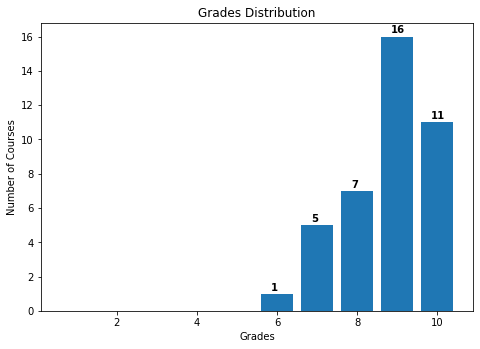

In [ ]:
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt

auth.authenticate_user()

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('Βαθμοί').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

Grades = [0] * 10
Grades_dict = {}
for i in rows:
    Grades_dict[i[0]] = int(i[3])
    Grades[int(i[3]) - 1] += 1

average = 0
for i in range(10):
    average += (i+1) * Grades[i]
print("Gpa = ",round(average / sum(Grades),3))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar([ i + 1 for i in range(10)],Grades)
for index, value in enumerate(Grades[5:]):
    plt.text(index + 5.85,value + .2, str(value), fontweight='bold')
plt.title("Grades Distribution")
plt.xlabel("Grades")
plt.ylabel("Number of Courses")
plt.savefig("Grdes.jpg", bbox_inches='tight' )
plt.show()